In [59]:
%matplotlib inline
import scipy.stats as stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,f1_score,fbeta_score,accuracy_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics


In [60]:
plt.style.use('ggplot')

In [61]:
data = pd.read_csv("C:/Users/Mert/Desktop/creditcard.csv")

In [62]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [63]:
data.shape

(284807, 31)

In [64]:
df = data.loc[:,['Time','Amount','Class']]

In [65]:
df.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


# EDA

In [66]:
df.describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [67]:
df.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


In [68]:
df.describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [69]:
df.isna().sum()

Time      0
Amount    0
Class     0
dtype: int64

In [70]:
df.dtypes

Time      float64
Amount    float64
Class       int64
dtype: object

C:\Users\Mert\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


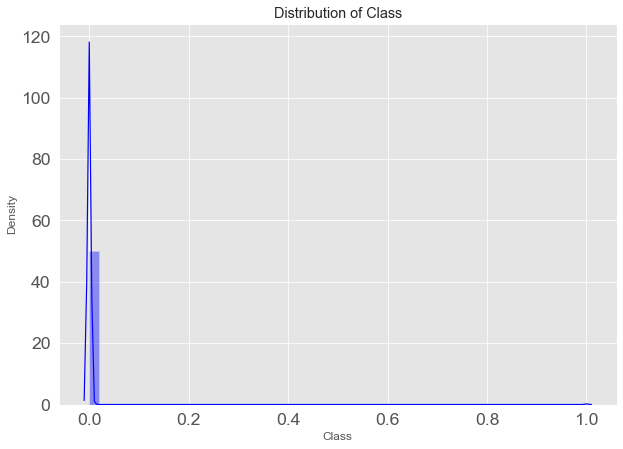

In [71]:
plt.figure(figsize=(10,7))
plt.title('Distribution of Class')
sns.distplot(df['Class'],color='blue');

C:\Users\Mert\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


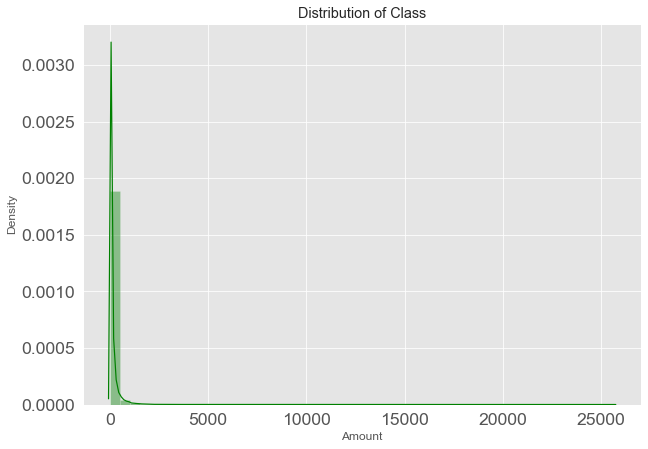

In [72]:
plt.figure(figsize=(10,7))
plt.title('Distribution of Class')
sns.distplot(df['Amount'],color='green');

C:\Users\Mert\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


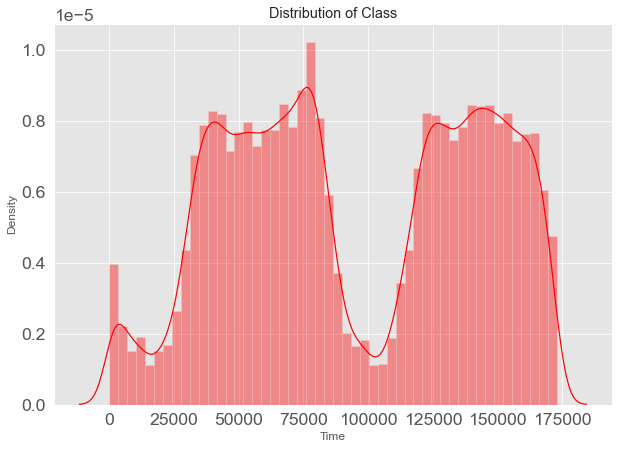

In [73]:
plt.figure(figsize=(10,7))
plt.title('Distribution of Class')
sns.distplot(df['Time'],color='red');

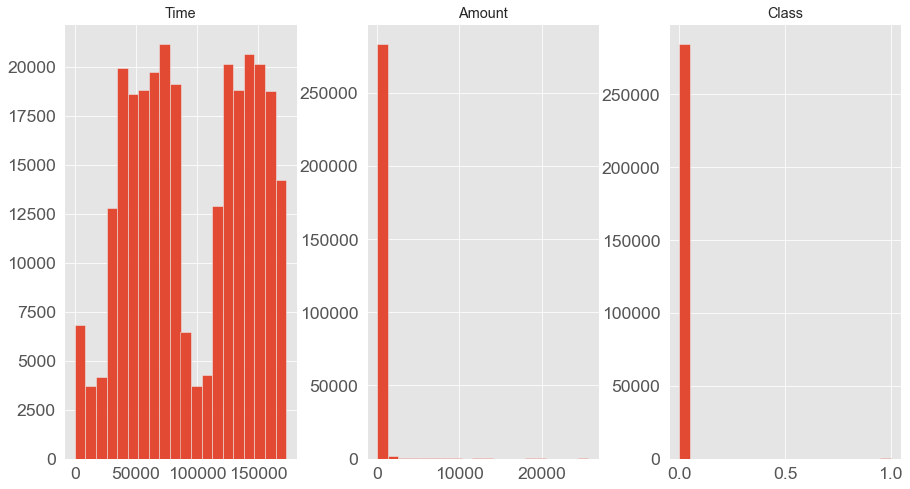

In [74]:
df.hist(bins = 20, figsize = (15,8),layout = (1,3));

In [75]:
df.corr()

,Time,Amount,Class
Time,1.000000,-0.010596,-0.012323
Amount,-0.010596,1.000000,0.005632
Class,-0.012323,0.005632,1.000000


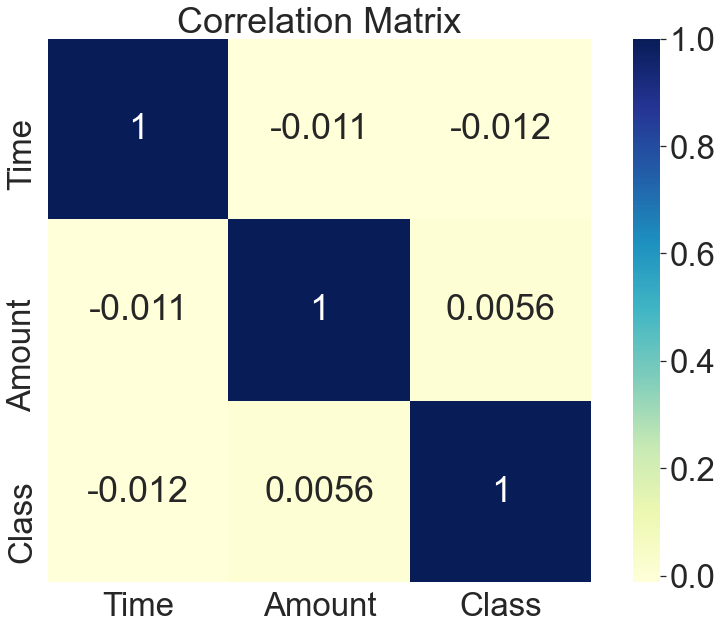

In [76]:
plt.figure(figsize=(15,10))
sns.set(font_scale=3)
sns.heatmap(df.corr(),vmax=1,square=True,annot=True,cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

In [77]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


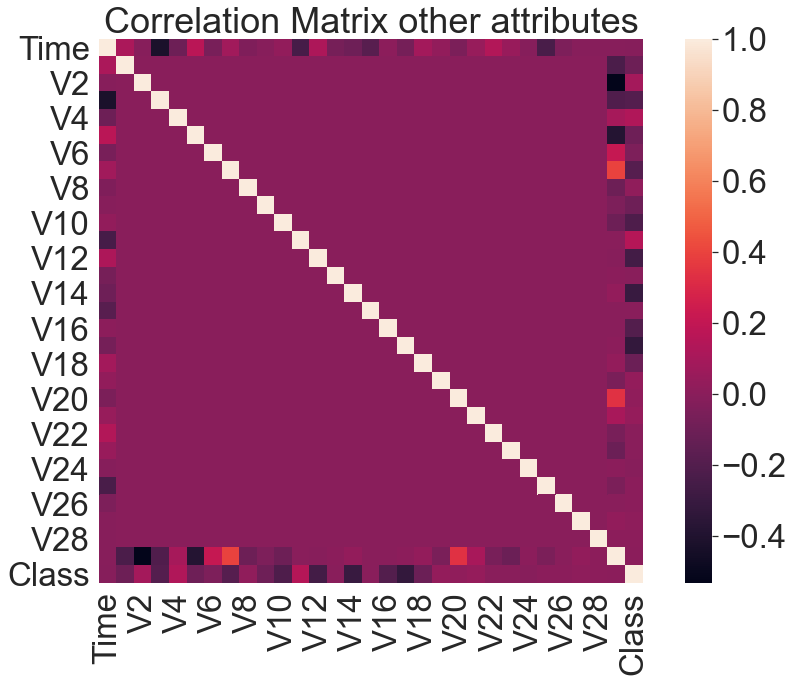

In [78]:
plt.figure(figsize=(15,10))
sns.set(font_scale=3)
sns.heatmap(data.corr(),vmax=1,square=True)
plt.title("Correlation Matrix other attributes")
plt.show()

C:\Users\Mert\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mert\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mert\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

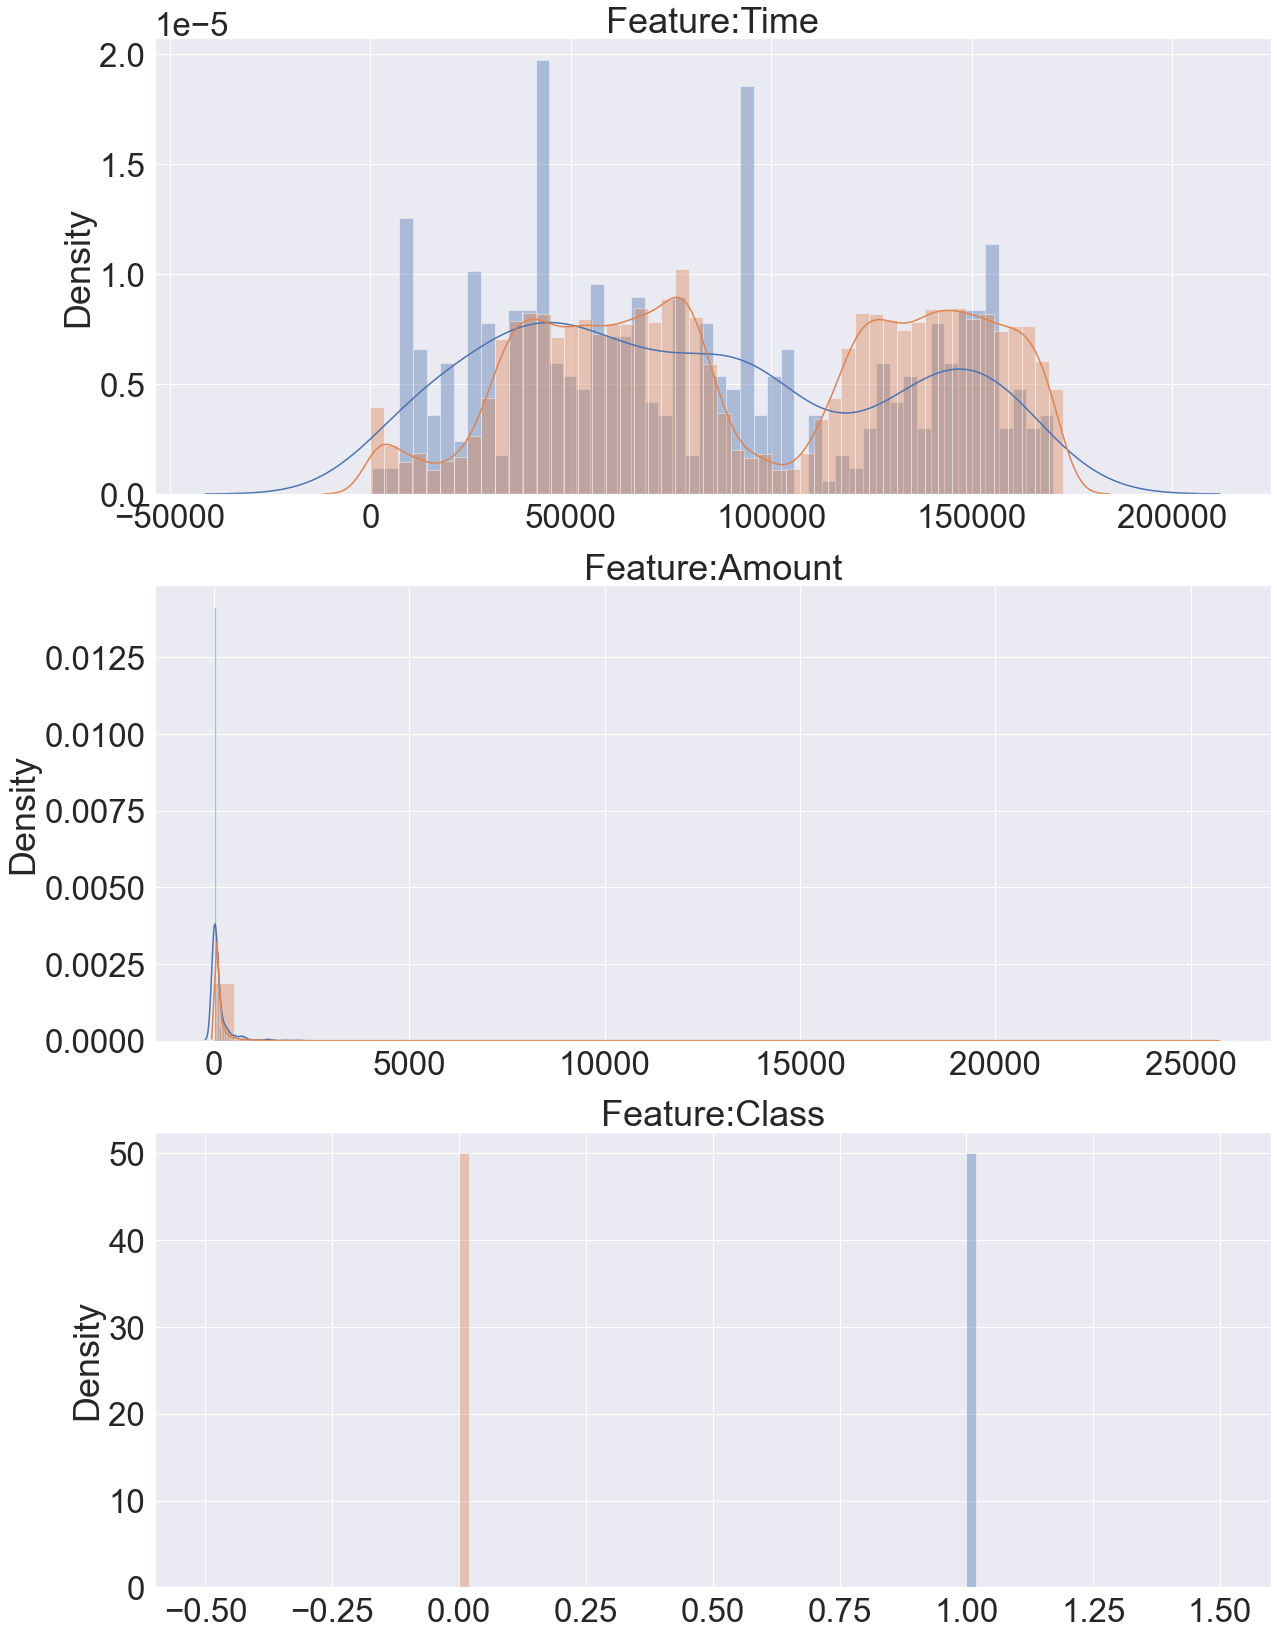

In [79]:
plt.figure(figsize=(20,30*10))
import matplotlib.gridspec as gridspec
features = df.iloc[:,0:30].columns
gs = gridspec.GridSpec(30,1)
for i, feature in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[feature] [df.Class == 1], bins=50)
    sns.distplot(df[feature] [df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Feature:' + str(feature))
plt.show()

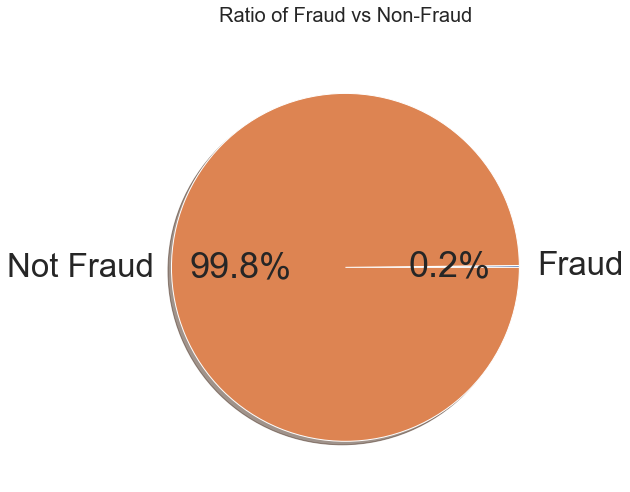

In [80]:
fraud = len(df[df['Class']==1])
notfraud = len(df[df['Class']==0])

labels = 'Fraud','Not Fraud'
sizes = [fraud,notfraud]

plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels,
       autopct ='%1.1f%%', shadow=True , startangle=0)
plt.title('Ratio of Fraud vs Non-Fraud\n',fontsize=20)
sns.set_context("paper",font_scale=2)

In [81]:
X=data.drop('Class',axis=1)
Y=data['Class']

In [82]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [83]:
#Training Data
X=pd.concat([X_train,Y_train],axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2557,2105.0,-2.289565,-0.480260,0.818685,-1.706423,0.822102,-1.660326,0.944047,-0.541765,1.323156,...,-0.210837,0.914737,0.867888,0.422969,0.310584,-0.781488,0.392241,-0.147757,1.00,0
247823,153702.0,-0.313717,-4.064342,-3.398445,0.704011,0.101662,1.529848,1.551670,-0.036774,0.015829,...,0.853186,-0.091941,-0.936215,-0.833081,-0.498728,0.651183,-0.290331,0.110360,1194.28,0
152342,97283.0,-1.809763,-0.567439,2.265186,-0.960318,-1.212537,1.516493,-1.417176,0.903421,1.961027,...,-0.509915,-0.424978,-0.268621,0.010121,0.466862,0.835540,-0.062385,0.088079,75.00,0
103385,68628.0,1.192319,0.178575,0.141491,0.459628,-0.049959,-0.112122,-0.163883,0.155740,-0.067566,...,-0.240464,-0.739862,0.116799,-0.373837,0.125470,0.130126,-0.016956,0.011937,1.98,0
8771,11951.0,-0.963451,0.700311,1.097333,-1.547626,0.669966,0.513533,0.333683,0.270900,1.381880,...,-0.279519,-0.470181,-0.124037,-1.388839,-0.237453,0.785347,0.349708,0.216207,37.31,0


In [84]:
#dummy classifier for verifying imbalance data
from sklearn.dummy import DummyClassifier

In [85]:
dummy = DummyClassifier(strategy ='most_frequent').fit(X_train,Y_train)
dummy_pred = dummy.predict(X_test)

print('Unique predicted labels:',np.unique(dummy_pred))
print('Test score:', accuracy_score(Y_test,dummy_pred))

Unique predicted labels: [0]
Test score: 0.9984082955888721


In [86]:
dummy_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
pd.DataFrame(confusion_matrix(Y_test,upsampled_pred)) #confusion matrix of linear reg
#x predict y actual

NameError: name 'upsampled_pred' is not defined

In [88]:
#Downsampling

#downsample majority

not_fraud_downsampled = resample ( not_fraud,
                                 replace=False,
                                 n_samples=len(fraud),
                                 random_state=42)

downsampled = pd.concat([not_fraud_downsampled,fraud])

downsampled.Class.value_counts()

NameError: name 'resample' is not defined

In [40]:
X_train = downsampled.drop('Class',axis=1)
Y_train = downsampled.Class

undersampled = LogisticRegression(solver='liblinear').fit(X_train,Y_train)

undersampled_pred = undersampled.predict(X_test)

In [41]:
undersampled_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
accuracy_score(Y_test,undersampled_pred)

0.9819411771590417

In [43]:
print("Logistic Regression downsampled Report")

print(classification_report(Y_test,undersampled_pred))

Logistic Regression downsampled Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.07      0.91      0.14       136

    accuracy                           0.98     85443
   macro avg       0.54      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [44]:
pd.DataFrame(confusion_matrix(Y_test,undersampled_pred)) #confusion matrix of linear reg downsampled


,0,1
0,83776,1531
1,12,124


In [45]:
#SMOTE

from imblearn.over_sampling import SMOTE



In [46]:
Y=df.Class
X=df.drop('Class',axis=1)

X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [47]:
sm=SMOTE(random_state = 42)
X_train1,Y_train1 = sm.fit_resample(X_train1,Y_train1)

In [48]:
smote = LogisticRegression(solver='liblinear').fit(X_train1,Y_train1)

smote_pred = smote.predict(X_test1)

accuracy_score(Y_test1,smote_pred)

0.9030464754280632

In [49]:
pd.DataFrame(confusion_matrix(Y_test1,smote_pred))

,0,1
0,77128,8179
1,105,31


In [50]:
from sklearn.ensemble import RandomForestClassifier



In [51]:
randf = RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)

randf_pred = randf.predict(X_test)

accuracy_score(Y_test,randf_pred)

0.9577496108516789

In [52]:
pd.DataFrame(confusion_matrix(Y_test1,randf_pred))

,0,1
0,81706,3601
1,9,127


In [53]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb_best = gnb.fit(X_train,Y_train)
gnb_pred=gnb_best.predict(X_test)
accuracy_score(Y_test,gnb_pred)

0.9909179218894467

In [54]:
pd.DataFrame(confusion_matrix(Y_test,gnb_pred))

,0,1
0,84565,742
1,34,102


In [55]:
 ###cv (SVM)##GridSearchCV ##SVC

C = [1]
gammas = [0.001,0.1]
param_grid = dict(C=C,gamma=gammas)

svm1=svm.SVC(kernel='rbf',probability=True)
svm_grid = GridSearchCV(svm1,param_grid,cv=5,scoring='roc_auc',verbose=10,n_jobs=-1)
svm_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1], 'gamma': [0.001, 0.1]}, scoring='roc_auc',
             verbose=10)

In [56]:
grid_pred = svm_grid.predict(X_test)
accuracy_score(Y_test,grid_pred)

0.9395971583394778

In [ ]:
knn = KNeighborsClassifier()


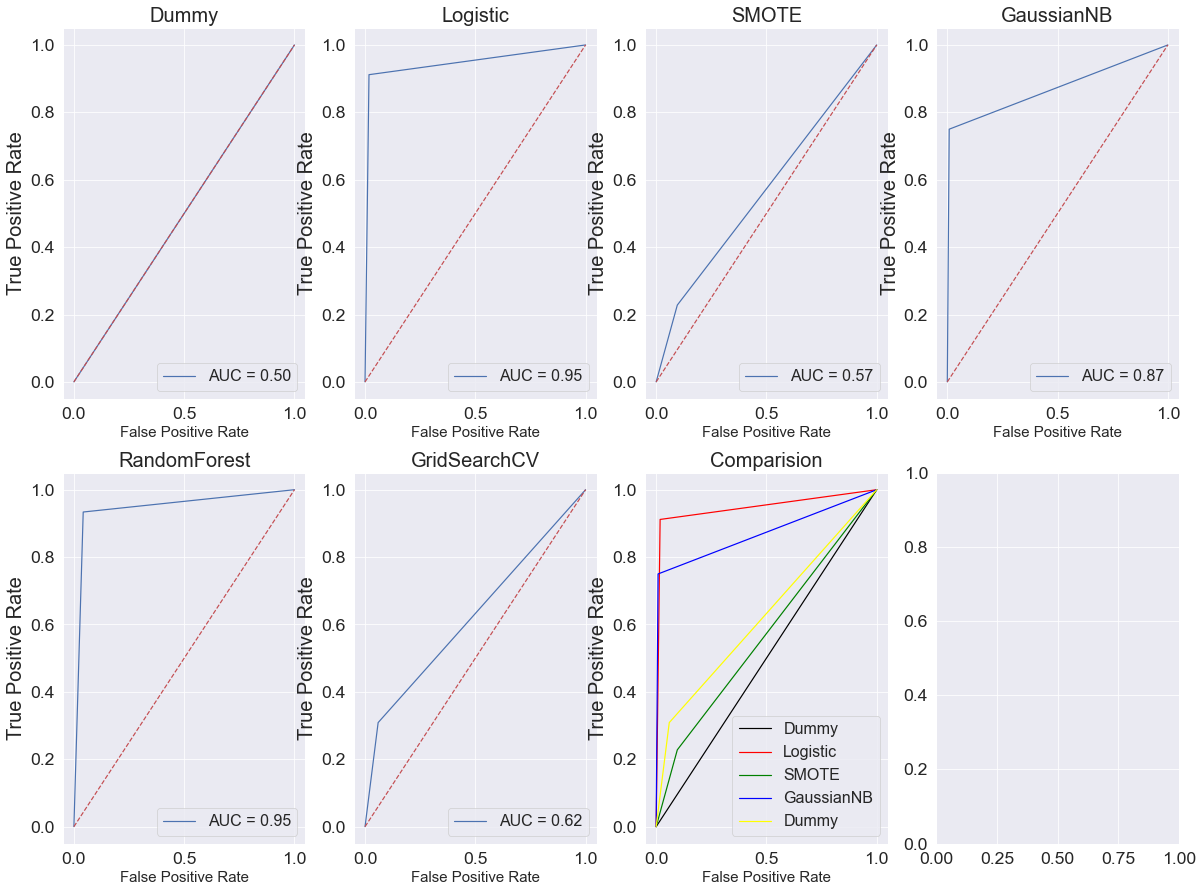

In [57]:
fig,ax_arr = plt.subplots(nrows = 2,ncols = 4,figsize = (20,15))

#dummy

dummy_pred = dummy.predict(X_test)
fprdm,tprdm,thresholddm = metrics.roc_curve(Y_test,dummy_pred)
roc_aucxgb = metrics.auc (fprdm,tprdm)

ax_arr[0,0].plot(fprdm,tprdm,'b',label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,0].plot([0,1],[0,1],'r--')
ax_arr[0,0].set_title('Dummy',fontsize = 20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc='lower right',prop={'size':16})

#logistics

undersampled_pred = undersampled.predict(X_test)
fprlog,tprlog,thresholdlog = metrics.roc_curve(Y_test,undersampled_pred)
roc_aucxgb = metrics.auc (fprlog,tprlog)
ax_arr[0,1].plot(fprlog,tprlog,'b',label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,1].plot([0,1],[0,1],'r--')
ax_arr[0,1].set_title('Logistic',fontsize = 20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc='lower right',prop={'size':16})

#Smote

smote_pred = smote.predict(X_test1)
fprsm,tprsm,thresholdsm = metrics.roc_curve(Y_test,smote_pred)
roc_aucxgb = metrics.auc (fprsm,tprsm)
ax_arr[0,2].plot(fprsm,tprsm,'b',label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,2].plot([0,1],[0,1],'r--')
ax_arr[0,2].set_title('SMOTE',fontsize = 20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc='lower right',prop={'size':16})

#GaussianNB
gnb_pred = gnb_best.predict(X_test)
fprgnb,tprgnb,thresholdgnd = metrics.roc_curve(Y_test,gnb_pred)
roc_aucxgb = metrics.auc(fprgnb,tprgnb)

ax_arr[0,3].plot(fprgnb,tprgnb,'b',label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,3].plot([0,1],[0,1],'r--')
ax_arr[0,3].set_title('GaussianNB',fontsize = 20)
ax_arr[0,3].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,3].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,3].legend(loc='lower right',prop={'size':16})

#RandomForest

randf_pred = randf.predict(X_test)
fprst,tprfst,thresholdfst= metrics.roc_curve(Y_test,randf_pred)
roc_aucxgb = metrics.auc(fprst,tprfst)

ax_arr[1,0].plot(fprst,tprfst,'b',label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,0].plot([0,1],[0,1],'r--')
ax_arr[1,0].set_title('RandomForest',fontsize = 20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc='lower right',prop={'size':16})

#GridSearchCV(SVM)

grid_pred = svm_grid.predict(X_test)
fprgsv,tprgsv,thresholdgsv = metrics.roc_curve(Y_test,grid_pred)
roc_aucxgb = metrics.auc(fprgsv,tprgsv)

ax_arr[1,1].plot(fprgsv,tprgsv,'b',label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,1].plot([0,1],[0,1],'r--')
ax_arr[1,1].set_title('GridSearchCV',fontsize = 20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc='lower right',prop={'size':16})


ax_arr[1,2].plot(fprdm,tprdm,'b',label='Dummy',color='black')
ax_arr[1,2].plot(fprlog,tprlog,'b',label='Logistic',color='red')
ax_arr[1,2].plot(fprsm,tprsm,'b',label='SMOTE',color='green')
ax_arr[1,2].plot(fprgnb,tprgnb,'b',label='GaussianNB',color='blue')
ax_arr[1,2].plot(fprgsv,tprgsv,'b',label='Dummy',color='yellow')
ax_arr[1,2].set_title('Comparision',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc='lower right',prop={'size':16})


In [58]:
!pip install hyperopt


C:\Users\Mert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution: 0=No Fraud | 1=Fraud')

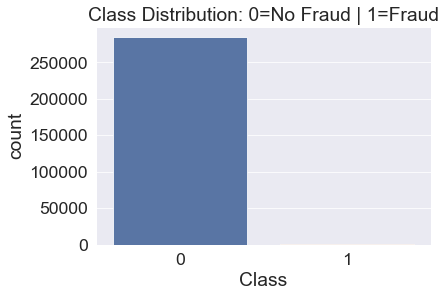

In [59]:
sns.countplot('Class', data=data)
plt.title('Class Distribution: 0=No Fraud | 1=Fraud')

In [63]:
rf1= RandomForestClassifier(random_state = 100, n_estimators = 100)


In [70]:
param_grid = {'n_estimators':[10,25,100],
         'min_samples_split':[3,5,10],
       'class_weight':['balanced',None],
        'max_depth':[3,5,None]}

grid = GridSearchCV(rf1,param_grid,n_jobs=-1,verbose=1,cv=2,scoring='f1')
grid.fit(X_train,Y_train)


Fitting 2 folds for each of 54 candidates, totalling 108 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [3, 5, None],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [10, 25, 100]},
             scoring='f1', verbose=1)

In [66]:
grid.best_score_

0.9176168464304058

In [67]:
grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [68]:
rf2= RandomForestClassifier(random_state = 100, n_estimators = 100)


In [73]:
rf2.fit(X_train,Y_train)
rf2_pred = rf2.predict(X_test)

In [74]:
accuracy_score(Y_test,rf2_pred)

0.9725196914902332

In [77]:
pd.DataFrame(confusion_matrix(Y_test,rf2_pred))

,0,1
0,82968,2339
1,9,127


In [80]:
rf3= RandomForestClassifier(random_state = 100, n_estimators = 100)


In [81]:
param_grid = {'n_estimators':[10,25,100],
         'min_samples_split':[3,5,10],
       'class_weight':['balanced',None],
        'max_depth':[3,5,None]}

grid = GridSearchCV(rf1,param_grid,n_jobs=-1,verbose=1,cv=2,scoring='f1')
grid.fit(X_train1,Y_train1)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [3, 5, None],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [10, 25, 100]},
             scoring='f1', verbose=1)

In [82]:
grid.best_score_

0.9278120892555315

In [83]:
grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [88]:
rf4= RandomForestClassifier(bootstrap= True,
 ccp_alpha= 0,

 min_samples_leaf= 1,
 min_samples_split= 3,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 100,
 n_jobs =None,
 oob_score= False,
 random_state= 100,
 verbose= 0,
 warm_start = False)


In [90]:
rf4.fit(X_train1,Y_train1)
rf4_pred = rf4.predict(X_test1)

In [91]:
accuracy_score(Y_test1,rf4_pred)

0.9269805601395082

In [92]:
pd.DataFrame(confusion_matrix(Y_test,rf4_pred)) #rf with smote

,0,1
0,79155,6152
1,87,49


In [126]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.
